In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

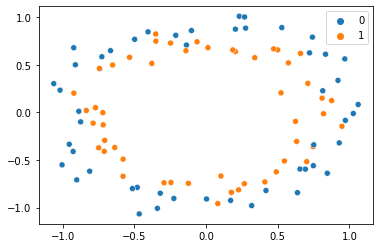

In [3]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

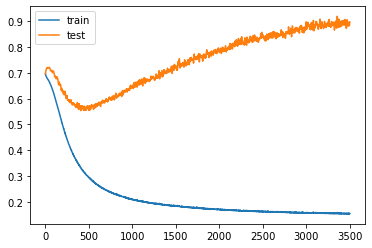

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 3s 681us/step


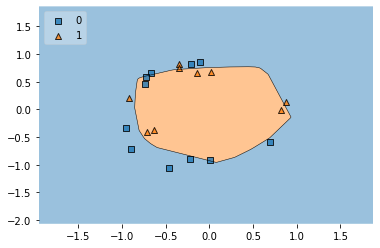

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 55ms/step - loss: 0.6984 - accuracy: 0.5000 - val_loss: 0.6997 - val_accuracy: 0.6000
Epoch 2/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6956 - accuracy: 0.4750 - val_loss: 0.6999 - val_accuracy: 0.6000
Epoch 3/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6944 - accuracy: 0.4875 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 4/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 5/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.7020 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6908 - accuracy: 0.5250 - val_loss: 0.7040 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6893 - accuracy: 0.5375 - val_loss: 0.7053 - val_accuracy: 0.3500
Epoch 8/3500


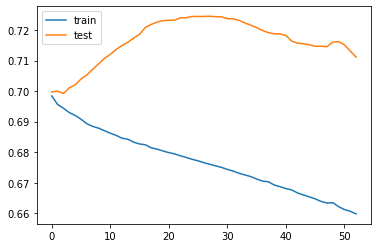

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 2s 574us/step


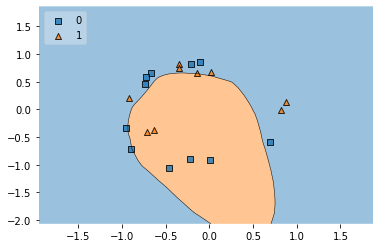

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()